In [14]:
!pip install geopandas --quiet

In [15]:
!rm -r /content/G.A.I_MISCELLANEUS_RESOURCES data_samples
!git clone https://github.com/Q-b1t/G.A.I_MISCELLANEUS_RESOURCES.git
!mkdir data_samples
!cp -r /content/G.A.I_MISCELLANEUS_RESOURCES/gis/* data_samples

Cloning into 'G.A.I_MISCELLANEUS_RESOURCES'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 139 (delta 0), reused 1 (delta 0), pack-reused 137 (from 1)
Receiving objects: 100% (139/139), 46.13 MiB | 10.97 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (54/54), done.


Pandas built-in visualizations are a high level interface to Matplotlib. Therefore they can be manipulated just as the same way.

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [17]:
grid = gpd.read_file('/content/data_samples/viz/mexico_boundaries.gpkg',layer='hex_50km')

In [18]:
table=pd.DataFrame(grid.drop('geometry', axis=1)) # remove geospatial data and transform to a standard DF
table.head()

,id,bird_obs,bird_rich,bird_summ,bird_shan,bird_simp,bird_even,plnt_summ,plnt_obs,plnt_rich,...,iei,edi,ita,eco_region,dist_to_city,dist_to_pa,pa,groups,rich_cat,total_obs
0,464,4008,155,"{'Accipiter': 23, 'Actitis': 68, 'Aechmophorus...",4.316211,52.739612,0.855809,"{'Abronia': 2, 'Achnatherum': 1, 'Acmispon': 9...",772,180,...,NaN,NaN,NaN,None,0.000000,114.322588,no_pa,0,low,5831
1,515,2243,131,"{'Accipiter': 21, 'Actitis': 6, 'Aeronautes': ...",4.135867,42.111048,0.848349,"{'Abutilon': 2, 'Acacia': 2, 'Acmispon': 3, 'A...",1129,316,...,NaN,NaN,NaN,None,2.268621,91.003104,no_pa,0,low,3512
2,516,18005,195,"{'Accipiter': 112, 'Actitis': 88, 'Aechmophoru...",4.518589,67.948922,0.856930,"{'': 2, 'Abronia': 7, 'Abutilon': 4, 'Acacia':...",5524,550,...,0.389281,0.225489,0.38523,mediterranean,4.265146,64.322588,no_pa,2,medium,24653
3,517,72257,207,"{'Accipiter': 643, 'Actitis': 346, 'Aechmophor...",4.432783,57.014540,0.831243,"{'': 2, 'Abies': 1, 'Abronia': 23, 'Abutilon':...",9529,629,...,NaN,NaN,NaN,None,52.133183,56.325225,no_pa,2,medium,84137
4,518,25,23,"{'Accipiter': 1, 'Aphelocoma': 1, 'Aquila': 1,...",3.107972,21.551724,0.991222,"{'Acmispon': 6, 'Adenostoma': 3, 'Adiantum': 5...",828,216,...,NaN,NaN,NaN,None,102.066259,79.587332,no_pa,1,very low,921


There are two ways that we can create a visualization in Pandas.  First we can call the data frames plot method and specify the type of plot we want with the kind parameter.

<Axes: ylabel='Frequency'>

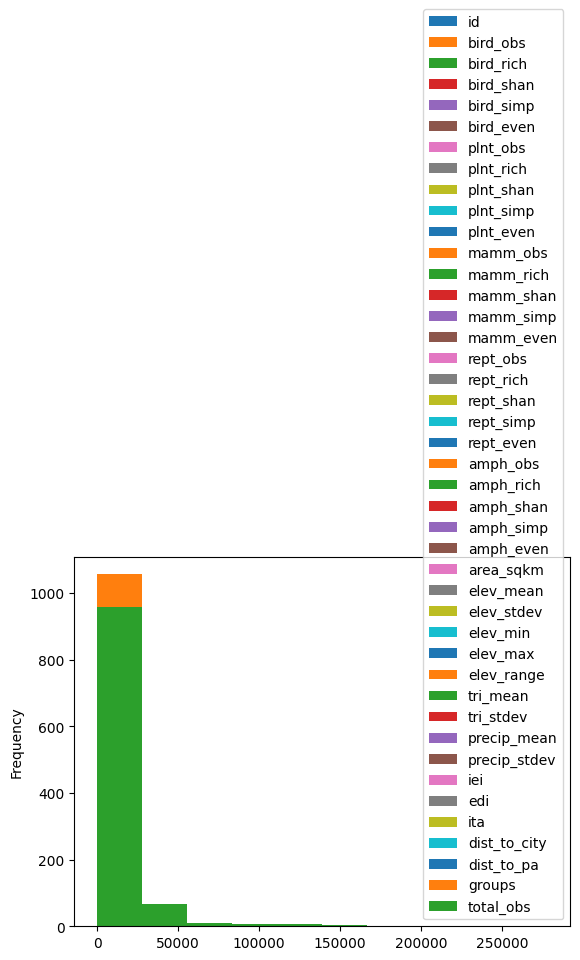

In [19]:
table.plot(kind='hist')

Specify only a pertinent subset of data for the creation

<Axes: ylabel='Frequency'>

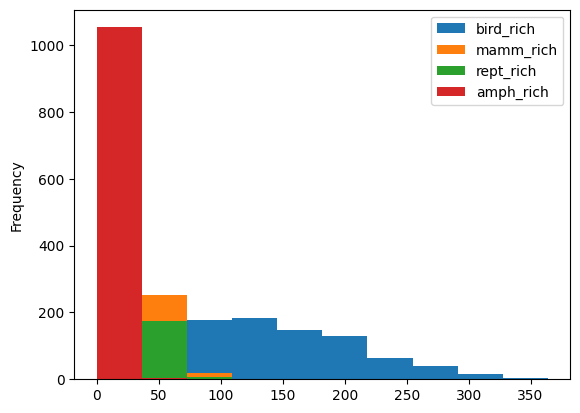

In [20]:
table[['bird_rich', 'mamm_rich', 'rept_rich', 'amph_rich']].plot(kind='hist')

Even with 4 columns this is not very useful.  We can solve this in a number of ways, first we can set the stacked arameter to true.

<Axes: ylabel='Frequency'>

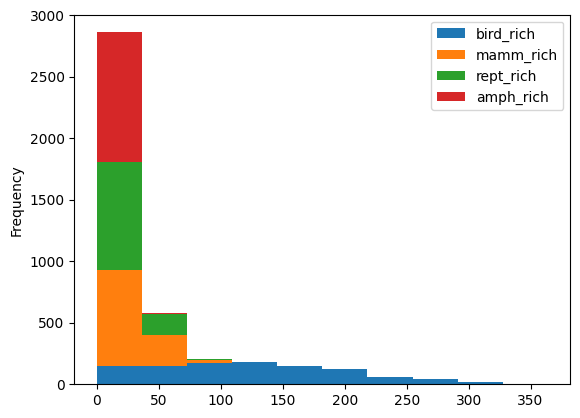

In [21]:
table[['bird_rich', 'mamm_rich', 'rept_rich', 'amph_rich']].plot(kind='hist', stacked=True)

Another option is to set the subplots property to True to get each plot in a separate subplot

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

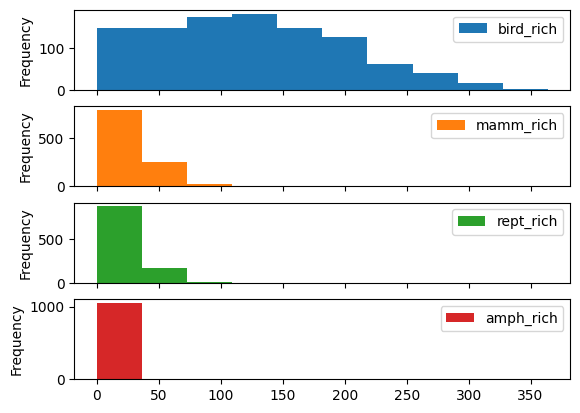

In [22]:
table[['bird_rich', 'mamm_rich', 'rept_rich', 'amph_rich']].plot(kind='hist', subplots=True)

We can also use many of the same parameters that we saw in Matplotlib, such as bins, xlim, and figsize.

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

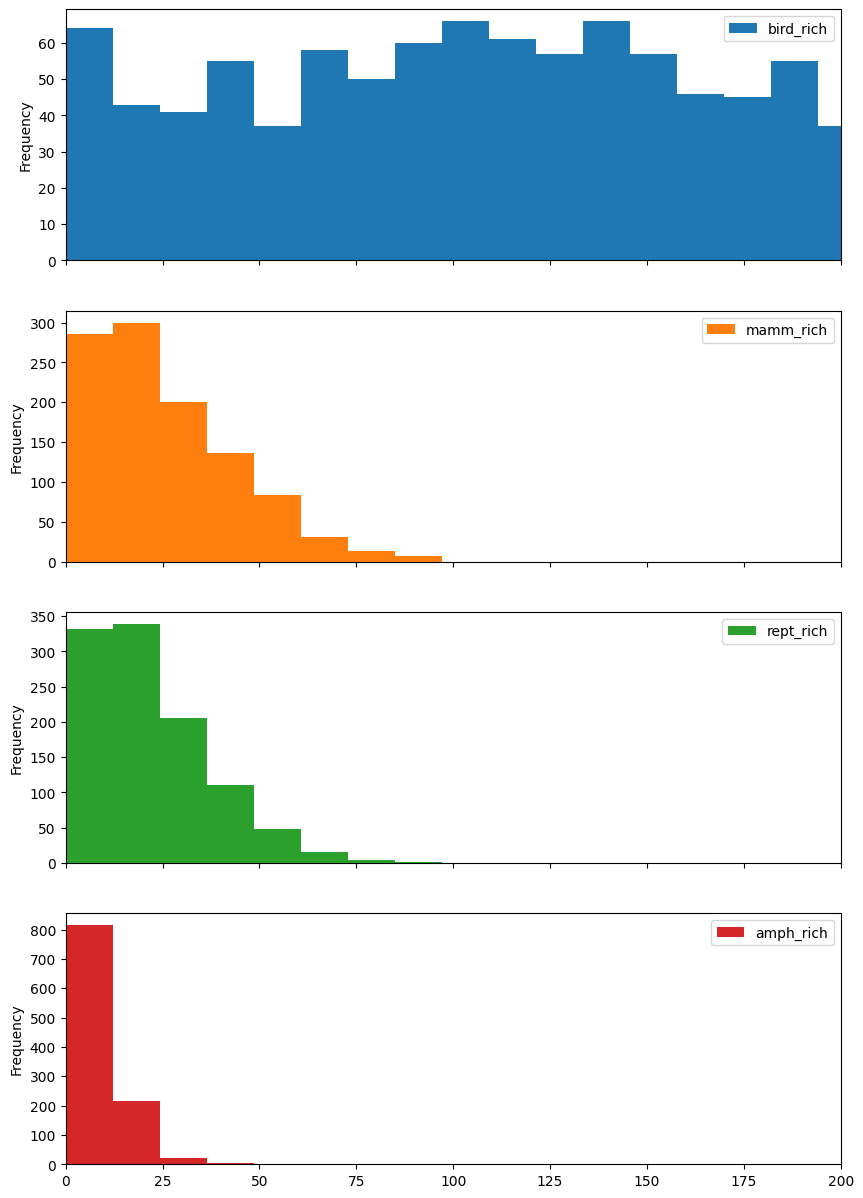

In [23]:
table[['bird_rich', 'mamm_rich', 'rept_rich', 'amph_rich']].plot(kind='hist', subplots=True,
            bins=30, xlim=(0,200), figsize=(10,15))

The second method for creating visualizations with pandas is to call specific plot types from the plot command.

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

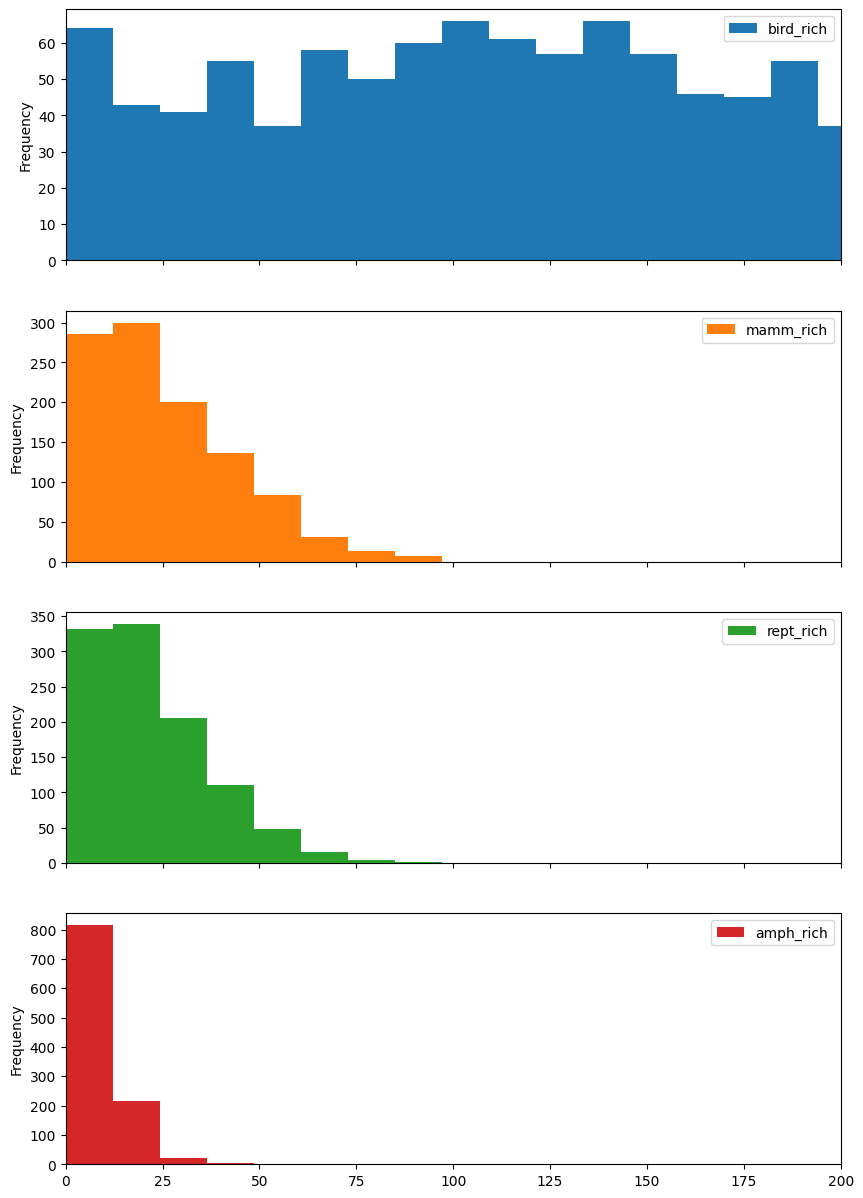

In [24]:
table[['bird_rich', 'mamm_rich', 'rept_rich', 'amph_rich']].plot.hist(subplots=True,
        bins=30, xlim=(0,200), figsize=(10,15))

Plots that take a single data series can also be called on a specific data series.

<Axes: ylabel='Frequency'>

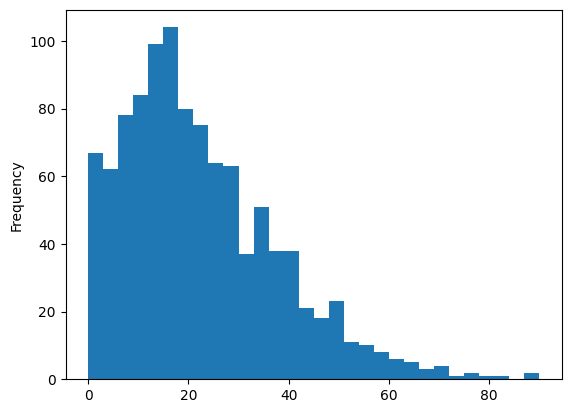

In [25]:
table['rept_rich'].plot.hist(bins=30)

We can use any matplotlib knowledge to customize these simple plots by specifying a figure and various axes

Text(0.5, 1.0, 'Histogram')

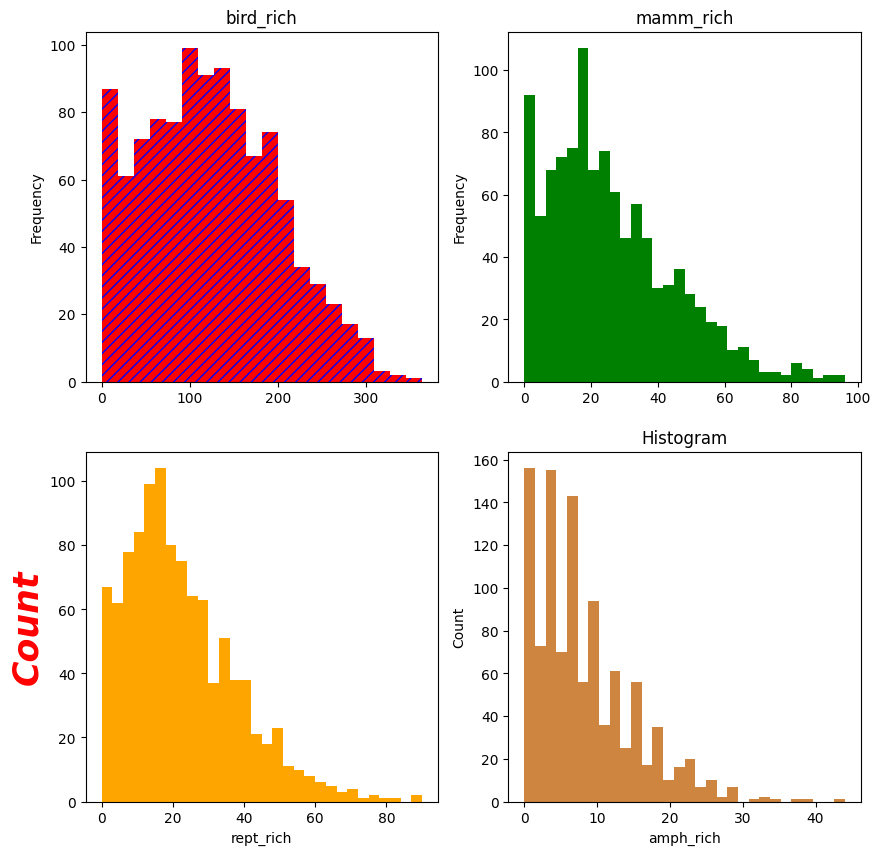

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0][0] = table['bird_rich'].plot.hist(bins=20, ax=ax[0][0], color='red', ec='b', lw=3, hatch='///', title='bird_rich');
ax[0][1] = table['mamm_rich'].plot.hist(bins=30, ax=ax[0][1], color='green', title='mamm_rich');
ax[1][0] = table['rept_rich'].plot.hist(bins=30, ax=ax[1][0], color='orange');
ax[1][0].set_xlabel('rept_rich')
ax[1][0].set_ylabel('Count', color='red', fontsize=25, fontweight='bold', fontstyle='italic', fontfamily='fantasy')
ax[1][1] = table['amph_rich'].plot.hist(bins=30, ax=ax[1][1], color='peru');
ax[1][1].set_xlabel('amph_rich')
ax[1][1].set_ylabel('Count')
ax[1][1].set_title('Histogram')

# Pandas Based Plots

One advantage of this method is that we can specify a categorical value as the by parameter which will automatically create a histogram for each subcategory in the category field.

array([[<Axes: title={'center': 'high'}>,
        <Axes: title={'center': 'low'}>],
       [<Axes: title={'center': 'medium'}>,
        <Axes: title={'center': 'very low'}>]], dtype=object)

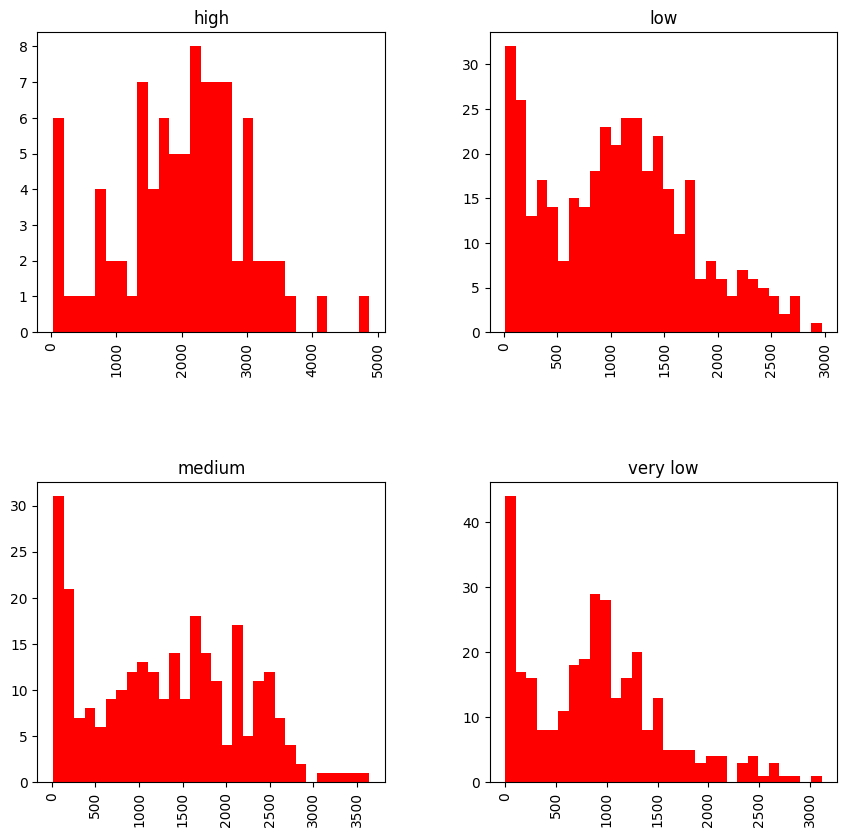

In [27]:
table.hist(column='elev_range', by='rich_cat', bins=30, color='red', ec='k', figsize=(10,10))

## Retrieve a Figure

If we want access to the plots figure object we can call pyplots gcf method (Get Current Figure). One thing this allows us to do is set the figures super title.


Text(0.5, 0.98, 'Histogram of elevational range by richness category')

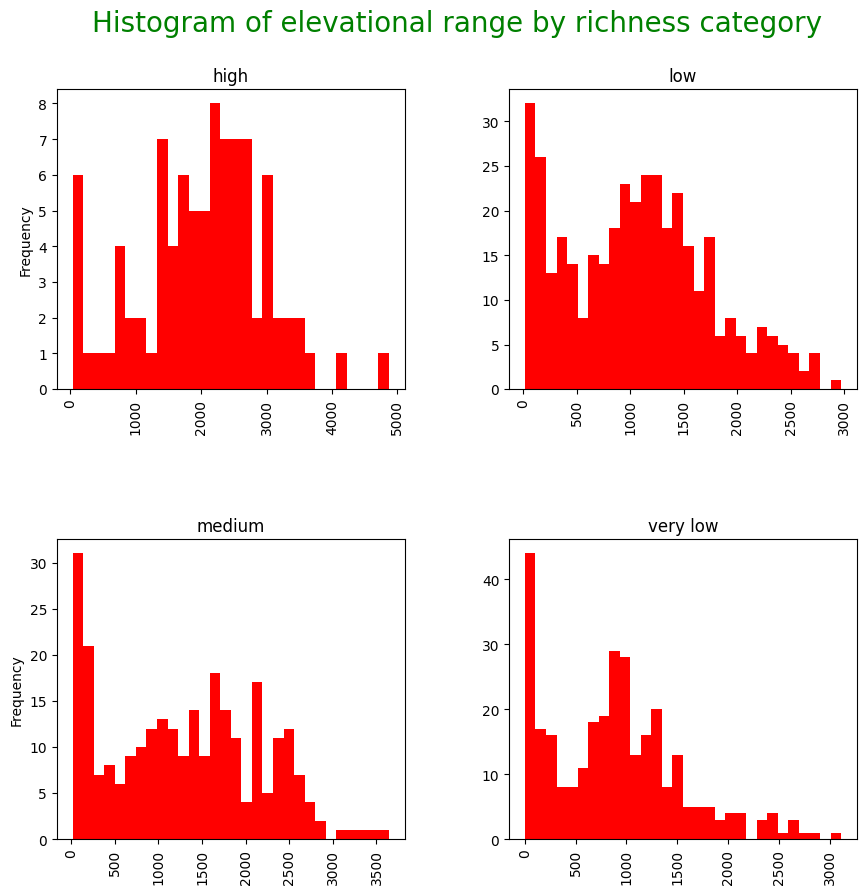

In [28]:
ax = table.hist(column='elev_range', by='rich_cat', bins=30, color='red', ec='k', figsize=(10,10))
ax[0,0].set_ylabel('Frequency')
ax[1,0].set_ylabel('Frequency')
fig=plt.gcf()
fig.suptitle('Histogram of elevational range by richness category', color='green', fontsize='20')

## Box Plot

Boxplots can also be called directly on the DataFrame.  Again, we need to specify the column containing numeric data who's distribution we want to summarize in a boxplot. Furthermore,  we can customize the plot using standar matplotlib params, and again we can partition out the boxplot by a categorical field such as rich_cat.  Now it is becoming clear that overall species richness increases with increased elevational range.

Text(0.5, 0.98, 'Boxplots of elevational range by richness category')

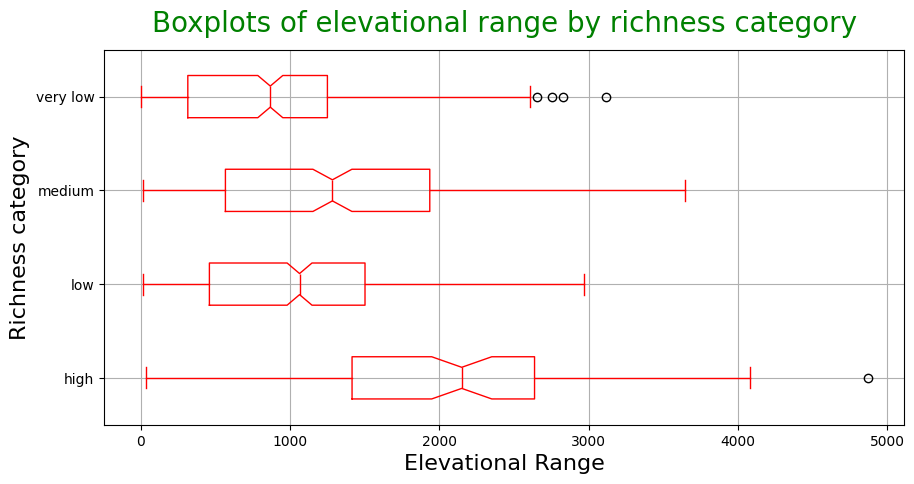

In [29]:
ax = table.boxplot(column='elev_range', by='rich_cat', color='red', figsize=(10,5), vert=False, notch=True);
ax.set_title('')
ax.set_xlabel('Elevational Range', fontsize=16)
ax.set_ylabel('Richness category', fontsize=16)
fig=plt.gcf()
fig.suptitle('Boxplots of elevational range by richness category', color='green', fontsize='20')

## Line plots

If no x value is specified the DataFrame index value is used for the x axis.

<Axes: >

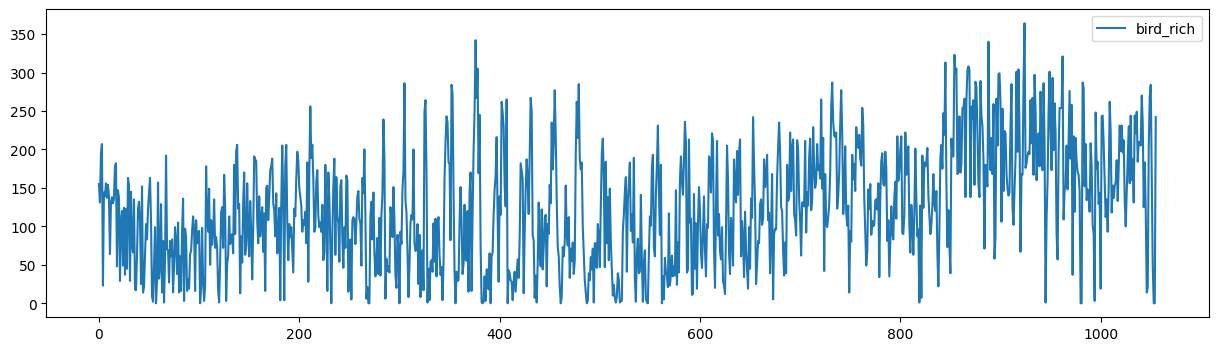

In [30]:
table.plot.line(y='bird_rich', figsize=(15,4))

We can specify another column to use other values as x-axis other than the traditional values.

<Axes: xlabel='elev_range'>

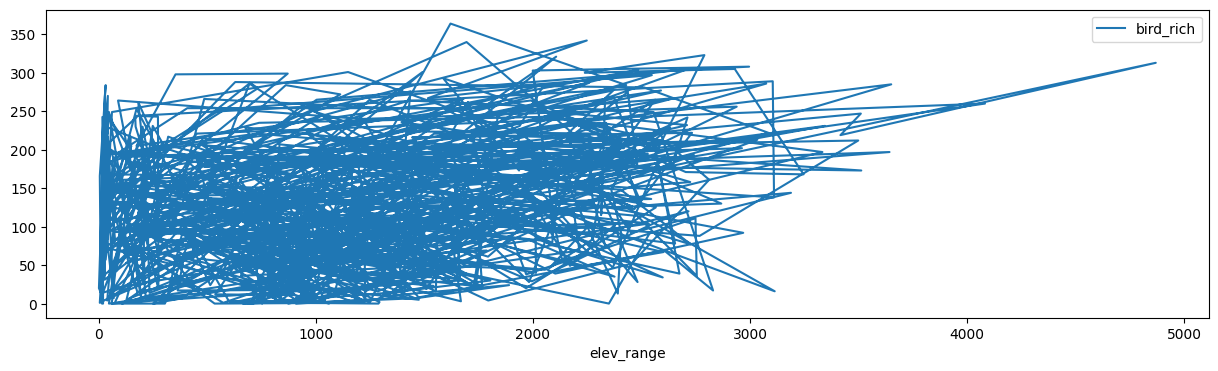

In [31]:
table.plot.line(x='elev_range', y='bird_rich', figsize=(15,4))

This is a bit of a mess but it can be addressed by sorting the data frame by the x axis column.

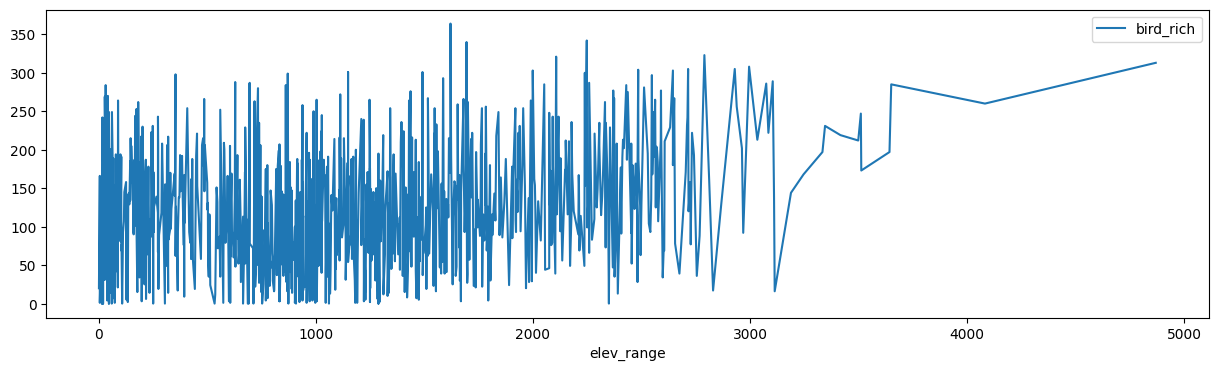

In [32]:
table.sort_values('elev_range').plot.line(x='elev_range', y='bird_rich', figsize=(15,4));

Area charts can also be created. They take the same form as line charts but fill the area under the line.  In this case I also sampled just 50 of the rows to make it clearer.

<Axes: xlabel='elev_range'>

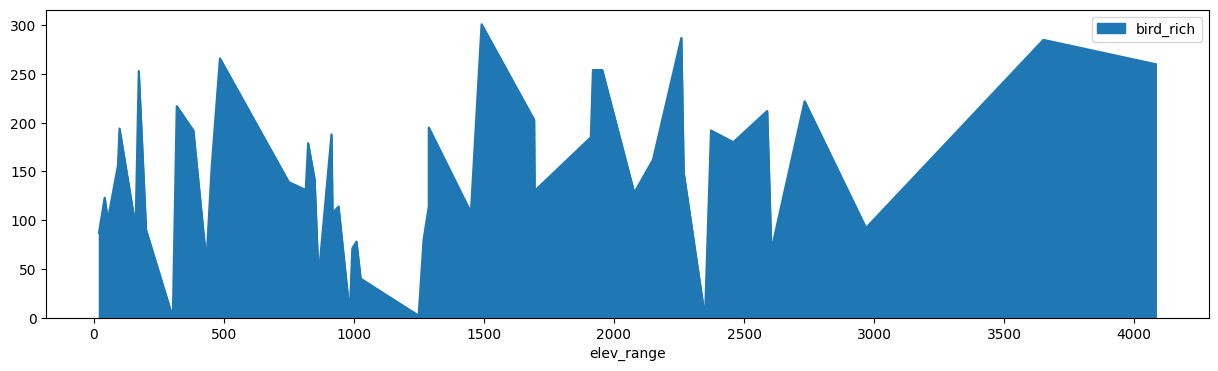

In [33]:
sample = table.sample(n=50)
sample.sort_values('elev_range').plot.area(x='elev_range', y='bird_rich', figsize=(15,4))

Area charts are typically used with multiple columns stacked on top of each other.  If the y axis column is not specified then all columns other then the x axis column will be plotted so it is often useful to specify a subset of the DataFrame.

<Axes: xlabel='elev_range'>

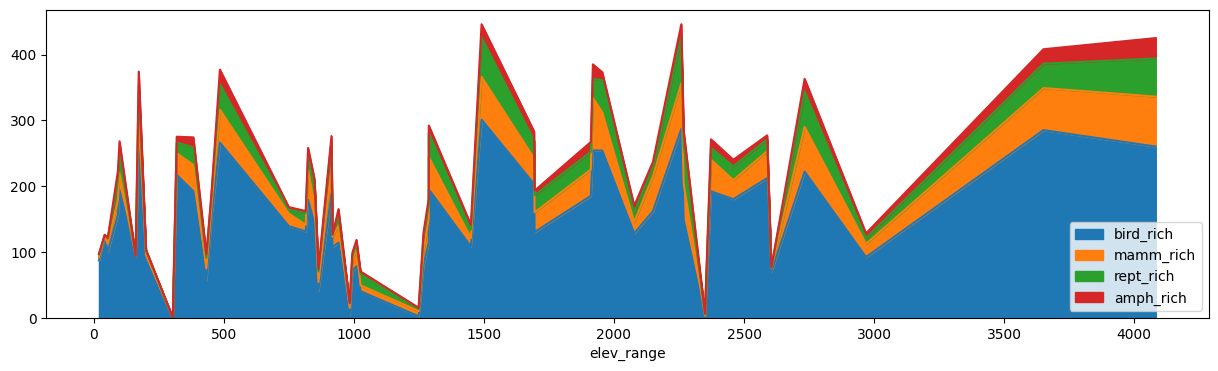

In [34]:
sample[['bird_rich', 'mamm_rich', 'rept_rich', 'amph_rich', 'elev_range']].sort_values(
    'elev_range').plot.area(x='elev_range', figsize=(15,4))

If you don't want the areas stacked, you can set the stacked parameter to False. Notice that the alpha value is automatically set to allow viewing of all the data series.

<Axes: xlabel='elev_range'>

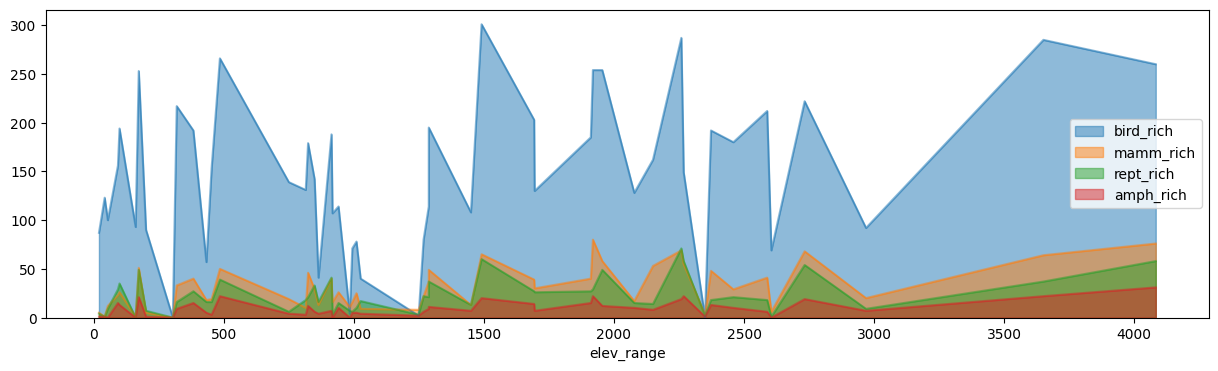

In [35]:
sample[['bird_rich', 'mamm_rich', 'rept_rich', 'amph_rich', 'elev_range']].sample(n=50).sort_values(
    'elev_range').plot.area(x='elev_range', figsize=(15,4), stacked=False)

You can also choose another colormap if you don't like the default.

<Axes: xlabel='elev_range'>

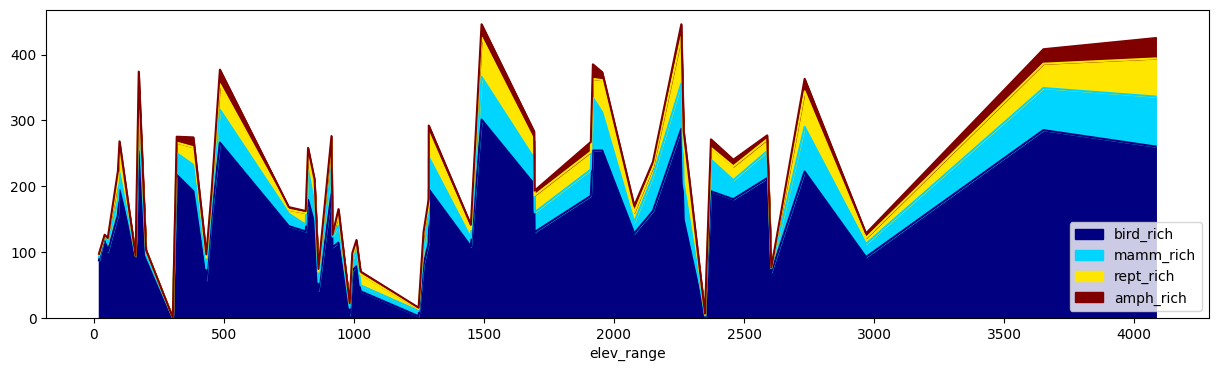

In [36]:
sample[['bird_rich', 'mamm_rich', 'rept_rich', 'amph_rich', 'elev_range']].sample(n=50).sort_values(
    'elev_range').plot.area(x='elev_range', figsize=(15,4), cmap='jet')

## Scatter plots

Scatter plots take the same form as line plots, however, they only include markers rather than lines connecting the markers

<Axes: xlabel='elev_range', ylabel='bird_rich'>

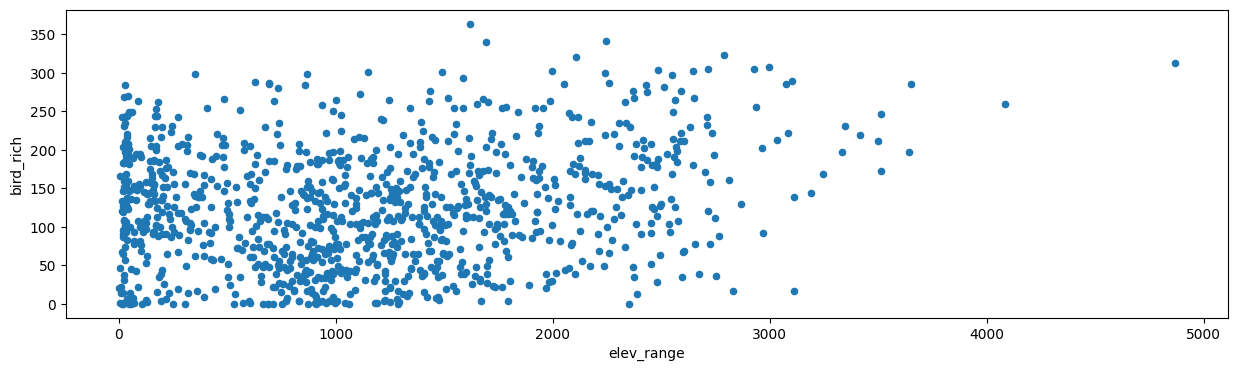

In [37]:
table.plot.scatter(x='elev_range', y='bird_rich', figsize=(15,4))

Of course we can also include the same styling options that we used with Matplotlib.

<Axes: xlabel='elev_range', ylabel='bird_rich'>

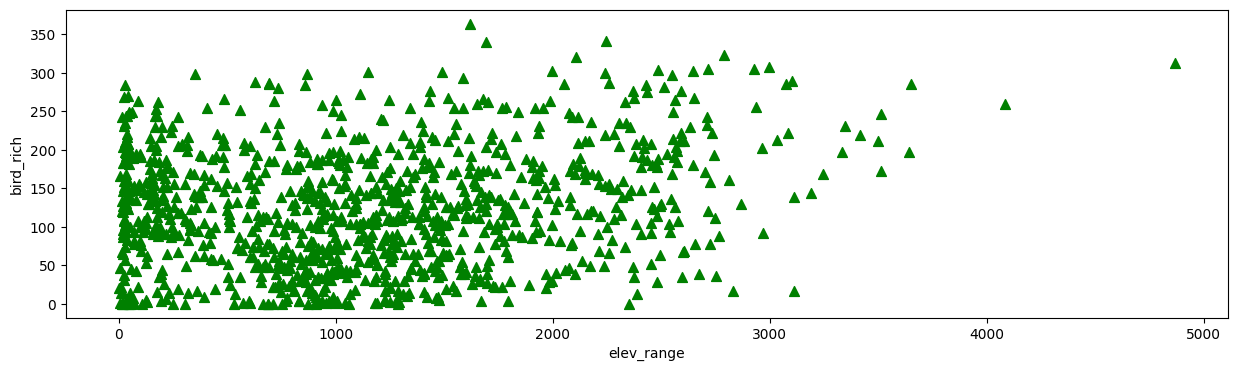

In [38]:
table.plot.scatter(x='elev_range', y='bird_rich', marker='^', color='g', s=50, figsize=(15,4))

In a previous lecture we saw one option for creating custom colors by adding a new column to the dataframe with the name of the color for each row.

Another option available with Panda's is to create subsets of each category as a separate data series and style them separately.

<Axes: xlabel='elev_range', ylabel='bird_rich'>

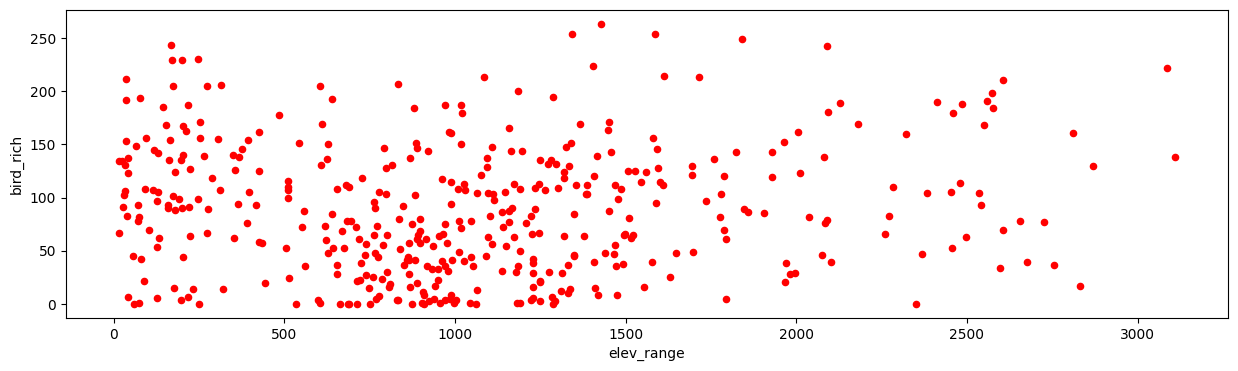

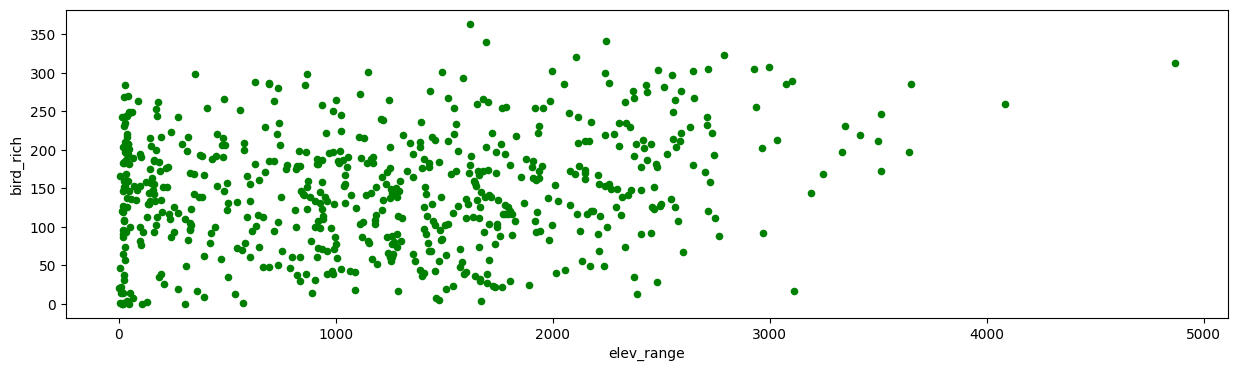

In [39]:
table[table['pa']=='no_pa'].plot.scatter(x='elev_range', y='bird_rich', c='red', figsize=(15,4))
table[table['pa']=='pa'].plot.scatter(x='elev_range', y='bird_rich', c='green', figsize=(15,4))

But how to get them to plot on the same axis?  Again our knowledge of Matplotlib is useful.  Recall that the return value of a call to a Panda's plot is a Matplotlib axes.  We can assign that axes to a variable and then specify in the following plots that we want to plot them on the same axis. If we specify a label for each series then we can also add a legend using the Matplotlib legend method.

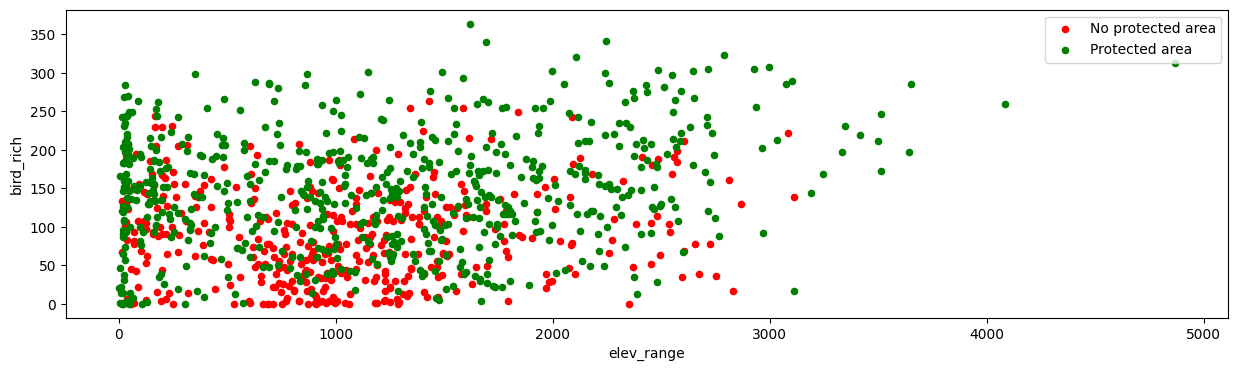

In [40]:
ax = table[table['pa']=='no_pa'].plot.scatter(x='elev_range', y='bird_rich', c='red', label='No protected area', figsize=(15,4))
table[table['pa']=='pa'].plot.scatter(ax=ax, x='elev_range', y='bird_rich', c='green', label='Protected area')
ax.legend()

In addition to color, we can also specify the size to be based on a numeric column.  The numeric column has to be passed as a Panda's data series and must be the same size as the x and y values.  So in this case we have to subset the size column just like we do the series.  The column can also be multiplied or divided by a constant to get an appropriate marker size.

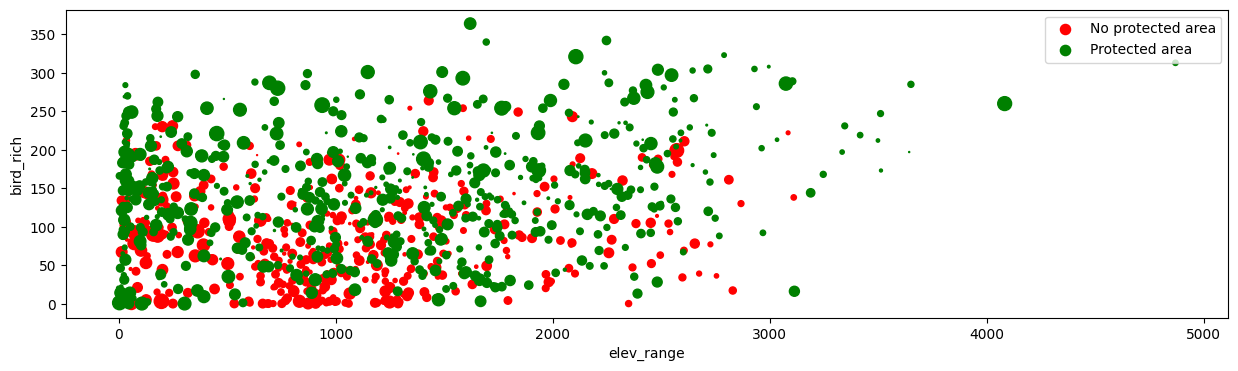

In [41]:
ax = table[table['pa']=='no_pa'].plot.scatter(x='elev_range', y='bird_rich', c='red',
        s=table[table['pa']=='no_pa']['dist_to_city']/5, label='No protected area', figsize=(15,4))
table[table['pa']=='pa'].plot.scatter(ax=ax, x='elev_range', y='bird_rich', c='green',
        s=table[table['pa']=='pa']['dist_to_city']/5, label='Protected area');
ax.legend()

# Hexbin plots

If you have dense data it can be useful to aggregate the points with a hexbin plot.  This creates a grid of hexagons with the number of points in each cell.  The gridsize parameter specifies the number of hexagons along each axis.  Smaller values result in larger cells.

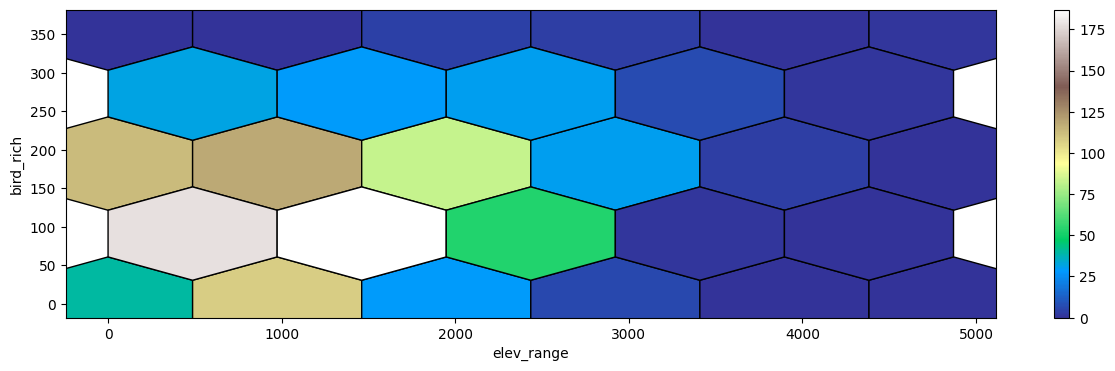

In [42]:
table.plot.hexbin(x='elev_range', y='bird_rich', gridsize=5, ec='k', cmap='terrain', figsize=(15,4));

## Bar Charts
As we discussed with matplotlib, bar charts are generally used with summarized data.  Often counts or averages.  Lets summarize our table by ecoregion using the panda's groupby method.

In [43]:
counts = table.groupby('eco_region').count()['id']
counts

,id
eco_region,
desert,259
mediterranean,12
mountain,192
prairie,51
semi_arid,110
tropical_dry,145
tropical_wet,128


We can call the bar method on the counts DataFrame to see the most basic bar chart.

<Axes: xlabel='eco_region'>

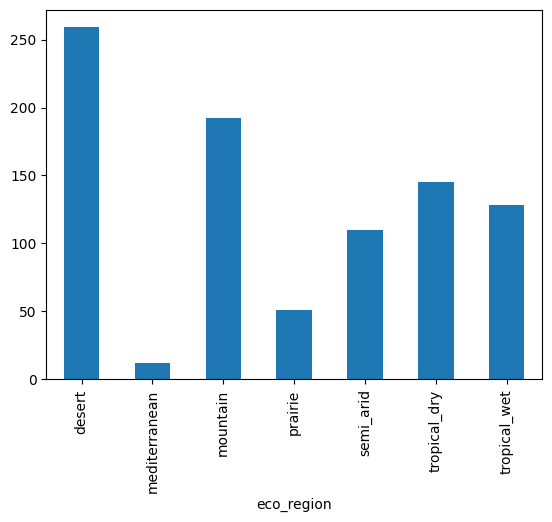

In [44]:
counts.plot.bar()

We could also summarize the means of our three environmental indices by ecoregion.

In [47]:
means = table[['eco_region','edi', 'ita', 'iei']].groupby('eco_region').mean()[['edi', 'ita', 'iei']]
means

,edi,ita,iei
eco_region,,,
desert,0.182231,0.216574,0.601195
mediterranean,0.151464,0.307379,0.541157
mountain,0.197440,0.296046,0.506514
prairie,0.171355,0.420338,0.408308
semi_arid,0.246728,0.326935,0.429465
tropical_dry,0.159824,0.421849,0.418328
tropical_wet,0.105702,0.497585,0.396713


<Axes: xlabel='eco_region'>

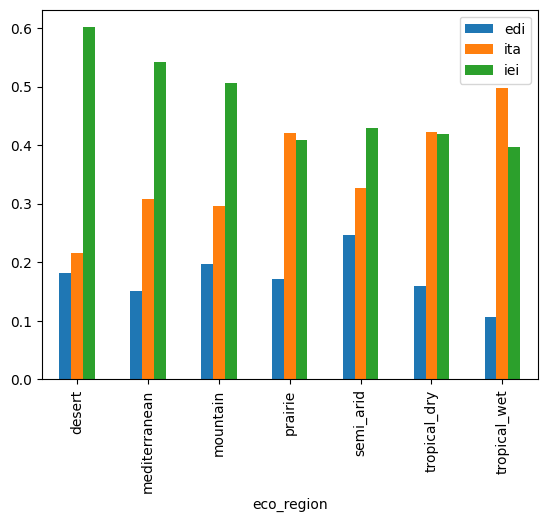

In [48]:
means.plot.bar()

If you prefer a stacked bar chart, simply set the stacked parameter to True

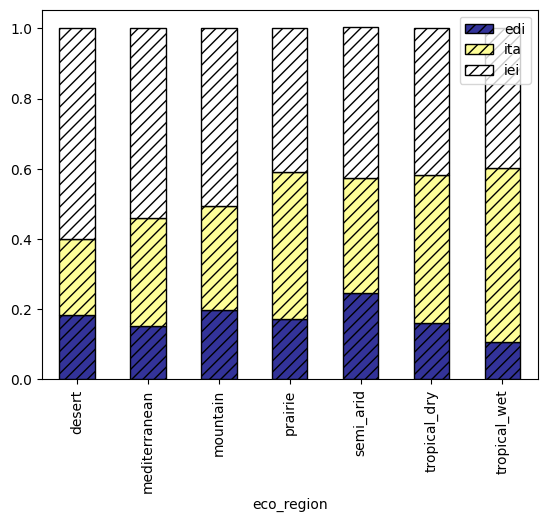

In [49]:
means.plot.bar(stacked=True, cmap='terrain', ec='k', hatch='///');

## Pie charts

Pie charts are also generally used on summarized data.  A pie chart of the counts DataFrame helps visualize the proportion of all the hex cells in each eco-region

<Axes: ylabel='id'>

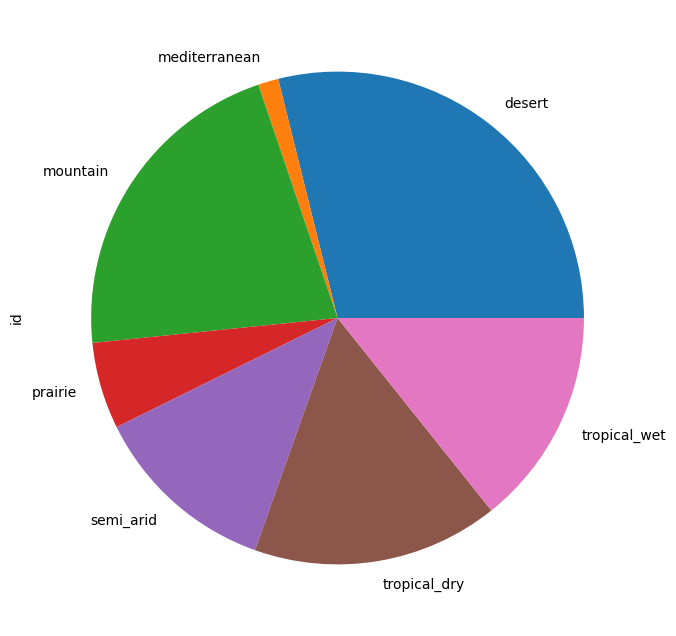

In [50]:
counts.plot.pie(figsize=(8,8))

We can add some styling to the pie chart with the autopct and fontsize parameters.

<Axes: ylabel='id'>

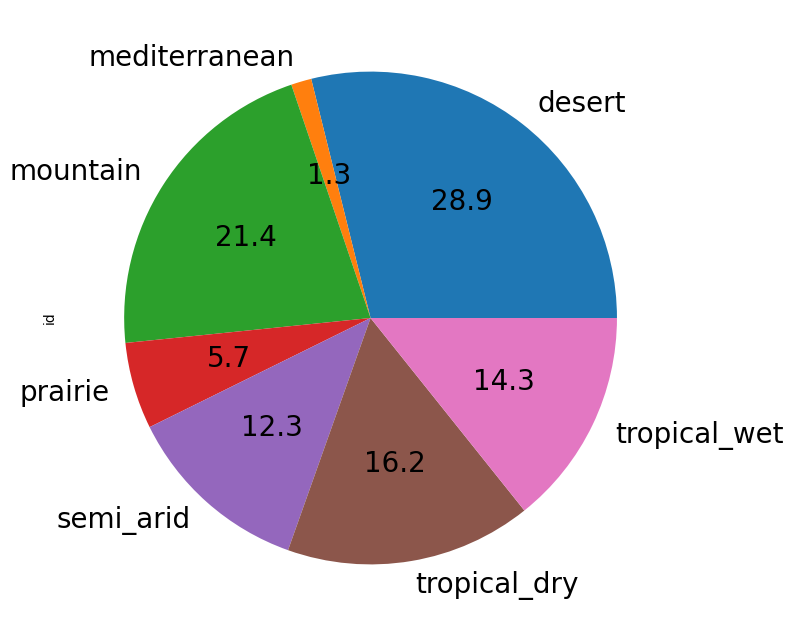

In [51]:
counts.plot.pie(autopct='%.1f', fontsize=20, figsize=(8,8))

We can control a lot more things as well.  The labels parameter takes a list of strings that override the default labels.  The colors parameter takes a list of colors for each slice of the pie.  Notice that the colors can be specified as named colors, hex strings, or single character color codes.  The explode parameter takes a list of floating points containing the amount to explode each slice.  Setting the legend parameter to True forces a legend to be drawn with the specified labels.  Setting the ylabel parameter to an empty string removes the id label. Setting labeldistance to None turns off printing of labels for each slice which would be redundant with the legend.

<Axes: >

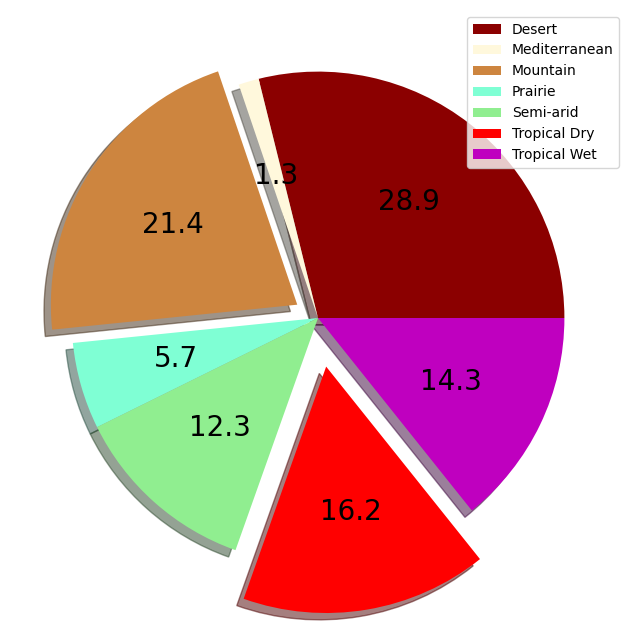

In [52]:
counts.plot.pie(labels=['Desert', 'Mediterranean', 'Mountain', 'Prairie', 'Semi-arid',
        'Tropical Dry', 'Tropical Wet'], colors=['darkred', 'cornsilk', 'peru', 'aquamarine',
        'lightgreen', '#FF0000', 'm'], explode=[0,0,0.1,0,0,0.2,0], legend=True, ylabel='',
        autopct='%.1f', shadow=True, labeldistance=None, fontsize=20, figsize=(8,8))

## Scatter Matrix
In a pevious lecture we created a scatter matrix with histograms on the diagonal with matplotlib.  This took about 10 lines of code.  With Panda's we can create something similar with a single line of code.

array([[<Axes: xlabel='bird_rich', ylabel='bird_rich'>,
        <Axes: xlabel='mamm_rich', ylabel='bird_rich'>,
        <Axes: xlabel='rept_rich', ylabel='bird_rich'>,
        <Axes: xlabel='amph_rich', ylabel='bird_rich'>],
       [<Axes: xlabel='bird_rich', ylabel='mamm_rich'>,
        <Axes: xlabel='mamm_rich', ylabel='mamm_rich'>,
        <Axes: xlabel='rept_rich', ylabel='mamm_rich'>,
        <Axes: xlabel='amph_rich', ylabel='mamm_rich'>],
       [<Axes: xlabel='bird_rich', ylabel='rept_rich'>,
        <Axes: xlabel='mamm_rich', ylabel='rept_rich'>,
        <Axes: xlabel='rept_rich', ylabel='rept_rich'>,
        <Axes: xlabel='amph_rich', ylabel='rept_rich'>],
       [<Axes: xlabel='bird_rich', ylabel='amph_rich'>,
        <Axes: xlabel='mamm_rich', ylabel='amph_rich'>,
        <Axes: xlabel='rept_rich', ylabel='amph_rich'>,
        <Axes: xlabel='amph_rich', ylabel='amph_rich'>]], dtype=object)

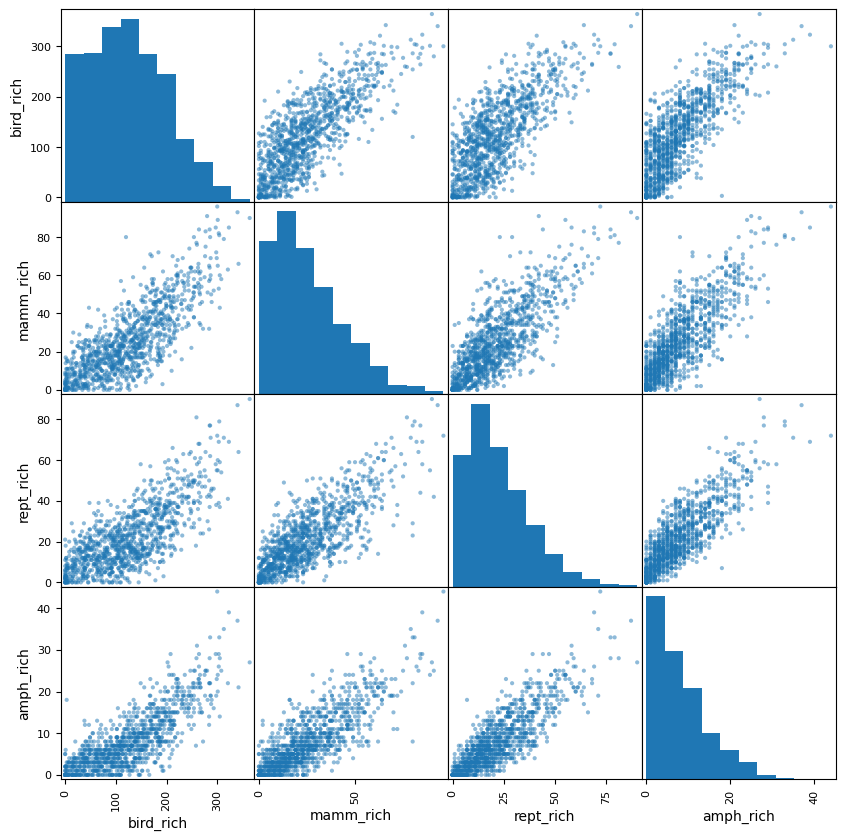

In [53]:
from pandas.plotting import scatter_matrix

scatter_matrix(table[['bird_rich', 'mamm_rich', 'rept_rich', 'amph_rich']], figsize=(10,10))

Another option is to display a kernal density estimator on the diagonal rather than a histogram.

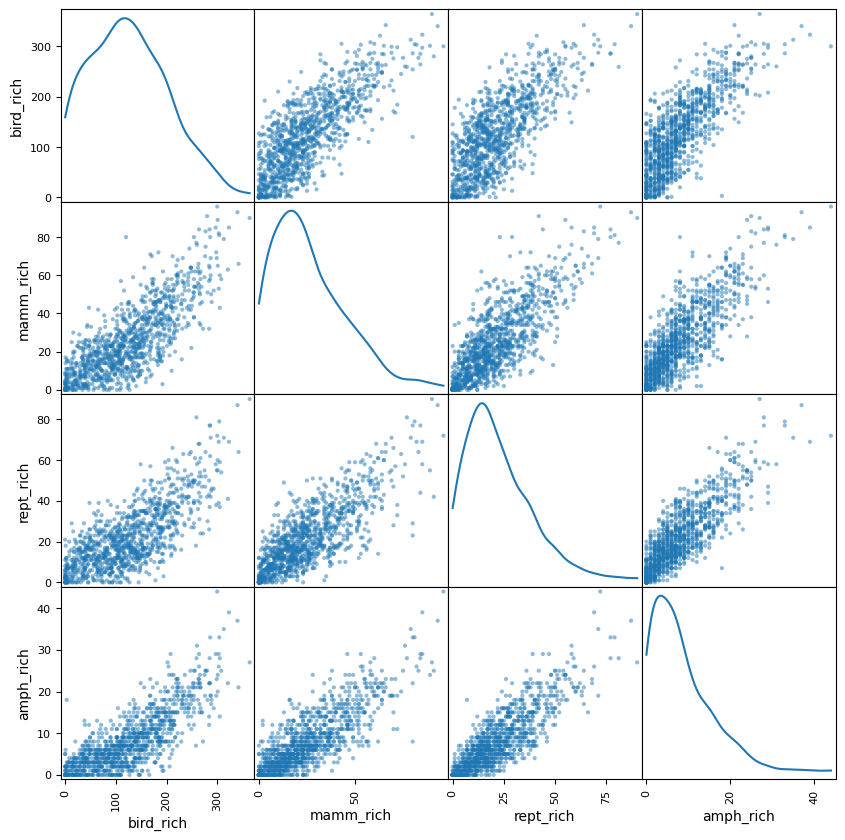

In [54]:
scatter_matrix(table[['bird_rich', 'mamm_rich', 'rept_rich', 'amph_rich']], diagonal='kde', figsize=(10,10))